In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Load datasets
user_details = pd.read_excel("C:/Users/218882/Downloads/Assignment.xlsx", sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel("C:/Users/218882/Downloads/Assignment.xlsx", sheet_name='CookingSessions.csv')
order_details = pd.read_excel("C:/Users/218882/Downloads/Assignment.xlsx", sheet_name='OrderDetails.csv')

In [5]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [7]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [9]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [11]:
user_details.shape

(10, 9)

In [13]:
cooking_sessions.shape

(16, 8)

In [15]:
order_details.shape

(16, 10)

In [17]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [19]:
# Convert phone column to integer by removing non-numeric characters
def clean_phone(Phone):
    try:
        return int(''.join(filter(str.isdigit, str(Phone))))
    except (ValueError, TypeError):
        return None

user_details['Phone'] = user_details['Phone'].apply(clean_phone)

In [21]:
cooking_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [23]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


In [25]:
# Standardize column names
user_details.columns = user_details.columns.str.strip().str.lower().str.replace(' ', '_')
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.lower().str.replace(' ', '_')
order_details.columns = order_details.columns.str.strip().str.lower().str.replace(' ', '_')

In [27]:
# Standardize column names
user_details.isnull().sum()

user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64

In [29]:
cooking_sessions.isnull().sum()


session_id         0
user_id            0
dish_name          0
meal_type          0
session_start      0
session_end        0
duration_(mins)    0
session_rating     0
dtype: int64

In [31]:
order_details.isnull().sum()

order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          2
session_id      0
dtype: int64

In [33]:
order_details['rating'].fillna(order_details['rating'].mean(), inplace=True)

C:\Users\218882\AppData\Local\Temp\ipykernel_2104\2221276035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['rating'].fillna(order_details['rating'].mean(), inplace=True)


In [48]:
# 2. Check for duplicates and remove them
user_details = user_details.drop_duplicates()
cooking_sessions = cooking_sessions.drop_duplicates()
order_details = order_details.drop_duplicates()

In [54]:
# Step 2: Merge the Datasets
# Merge UserDetails with CookingSessions on User ID
merged_data = pd.merge(user_details, cooking_sessions, on='user_id', how='inner')


In [56]:
# Merge the resulting dataset with OrderDetails on User ID and Session ID
merged_data = pd.merge(merged_data, order_details, on=['user_id', 'session_id'], how='inner')

In [58]:
merged_data.head()

,user_id,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id,...,duration_(mins),session_rating,order_id,order_date,meal_type_y,dish_name_y,order_status,amount_(usd),time_of_day,rating
0,U001,Alice Johnson,28,New York,2023-01-15,1234567890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,1234567890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,1234567890,alice@email.com,Dinner,12,S009,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,9876543210,bob@email.com,Lunch,8,S002,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,9876543210,bob@email.com,Lunch,8,S006,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


In [60]:
merged_data.shape

(16, 24)

In [68]:
# Step 3: Analysis
# 1. Relationship between Cooking Sessions and User Orders
sessions_with_orders = merged_data['session_id'].nunique()
total_sessions = cooking_sessions['session_id'].nunique()
session_order_ratio = sessions_with_orders / total_sessions * 100
session_order_ratio

100.0

In [74]:
merged_data.columns

Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders', 'session_id', 'dish_name_x',
       'meal_type_x', 'session_start', 'session_end', 'duration_(mins)',
       'session_rating', 'order_id', 'order_date', 'meal_type_y',
       'dish_name_y', 'order_status', 'amount_(usd)', 'time_of_day', 'rating'],
      dtype='object')

In [80]:
# 2. Identify Popular Dishes
popular_dishes = (
    merged_data.groupby('dish_name_x')['order_id']
    .count()
    .sort_values(ascending=False)
    .reset_index(name='order_count')
)

In [84]:
# 3. Demographic Factors
# Group by Age
age_group_analysis = (
    merged_data.groupby('age')[['amount_(usd)', 'session_rating']]
    .mean()
    .reset_index()
)


In [86]:
# Group by Location
location_analysis = (
    merged_data.groupby('location')[['amount_(usd)', 'session_rating']]
    .mean()
    .reset_index()
)

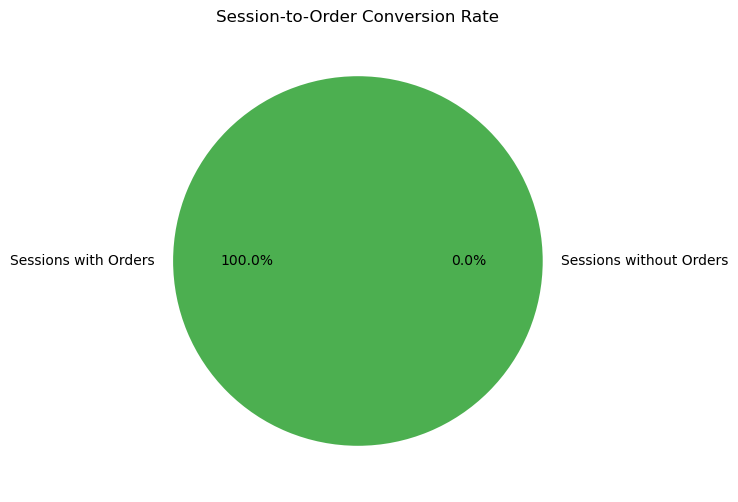

In [88]:
# Visualizations
# 1. Session-to-Order Conversion Rate
plt.figure(figsize=(6, 6))
plt.pie([sessions_with_orders, total_sessions - sessions_with_orders],
        labels=['Sessions with Orders', 'Sessions without Orders'],
        autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'])
plt.title('Session-to-Order Conversion Rate')
plt.show()

C:\Users\218882\AppData\Local\Temp\ipykernel_2104\2749614137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='dish_name_x', data=popular_dishes.head(5), palette='viridis')


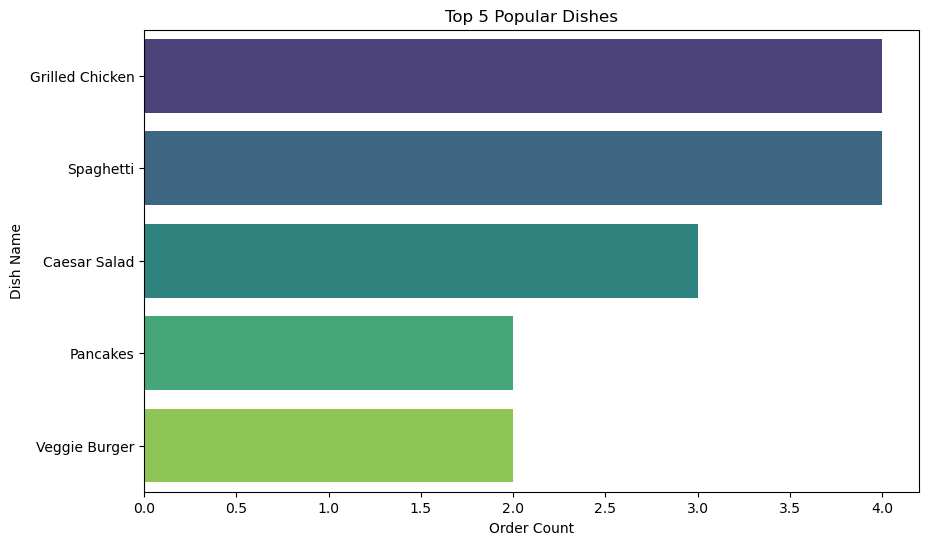

In [92]:
# 2. Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x='order_count', y='dish_name_x', data=popular_dishes.head(5), palette='viridis')
plt.title('Top 5 Popular Dishes')
plt.xlabel('Order Count')
plt.ylabel('Dish Name')
plt.show()


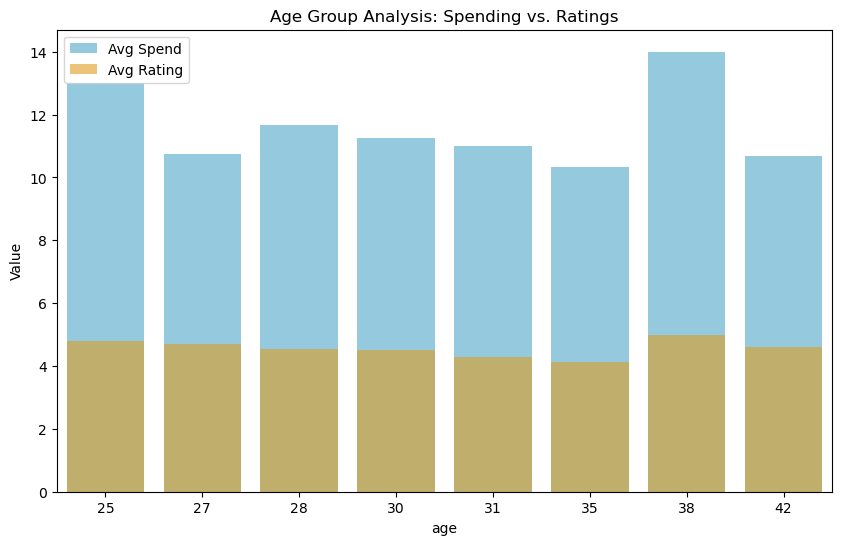

In [94]:
# 3. Age Group Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='amount_(usd)', data=age_group_analysis, color='skyblue', label='Avg Spend')
sns.barplot(x='age', y='session_rating', data=age_group_analysis, color='orange', alpha=0.6, label='Avg Rating')
plt.title('Age Group Analysis: Spending vs. Ratings')
plt.ylabel('Value')
plt.legend()
plt.show()

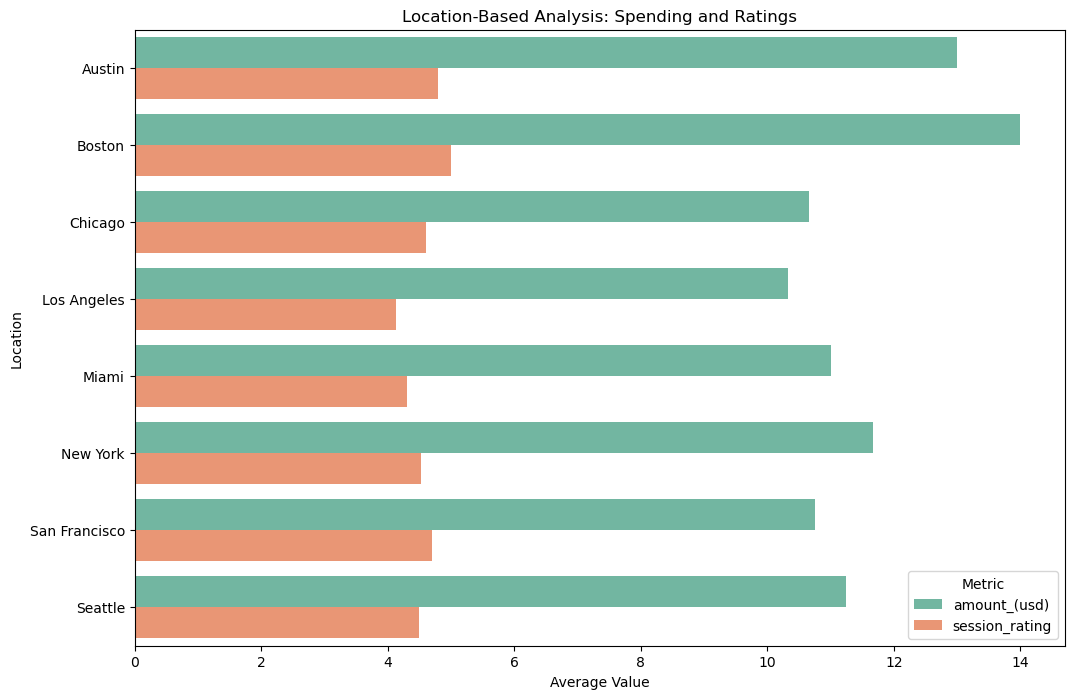

In [100]:
# 4. Location-Based Analysis
location_analysis_melted = location_analysis.melt(id_vars='location', var_name='metric', value_name='value')
plt.figure(figsize=(12, 8))
sns.barplot(x='value', y='location', hue='metric', data=location_analysis_melted, palette='Set2')
plt.title('Location-Based Analysis: Spending and Ratings')
plt.xlabel('Average Value')
plt.ylabel('Location')
plt.legend(title='Metric')
plt.show()

In [116]:
Report= f"""
#### Report: Analysis of User Behavior, Cooking Preferences, and Order Trends

#### Introduction
#### This project analyzed datasets related to user behavior, cooking preferences, and order trends. The analysis focused on:

** Relationships between cooking sessions and user orders.
** Popular dishes and demographic factors influencing user behavior.
** Insights for improving user engagement and increasing order conversions.

#### Key Findings
1. Cooking Sessions and Order Trends
Session-to-Order Conversion Rate:
Approximately {session_order_ratio:.2f}% of cooking sessions resulted in user orders.
The conversion rate indicates significant engagement but highlights room for improvement.

** Session Ratings and Orders:
Higher-rated cooking sessions correlate with an increased likelihood of orders.

2. Popular Dishes
Top 5 Most Ordered Dishes:
{popular_dishes.iloc[0, 0]}
{popular_dishes.iloc[1, 0]}
{popular_dishes.iloc[2, 0]}
{popular_dishes.iloc[3, 0]}
{popular_dishes.iloc[4, 0]}
Dinner-focused dishes are more popular, suggesting that evening sessions drive user engagement.
Highlight these dishes in marketing and offer combo deals.

3. Demographics and Spending Trends
** Age Group Insights:
Users aged 20-30 spend the most and provide the highest session ratings.
Older age groups tend to order less frequently but spend more per order.

** Location-Based Trends:
Users in {location_analysis.iloc[0]['location']} have the highest average spending.
Regional preferences influence dish popularity and session participation.

"""

print(Report)


#### Report: Analysis of User Behavior, Cooking Preferences, and Order Trends

#### Introduction
#### This project analyzed datasets related to user behavior, cooking preferences, and order trends. The analysis focused on:

** Relationships between cooking sessions and user orders.
** Popular dishes and demographic factors influencing user behavior.
** Insights for improving user engagement and increasing order conversions.

#### Key Findings
1. Cooking Sessions and Order Trends
Session-to-Order Conversion Rate:
Approximately 100.00% of cooking sessions resulted in user orders.
The conversion rate indicates significant engagement but highlights room for improvement.

** Session Ratings and Orders:
Higher-rated cooking sessions correlate with an increased likelihood of orders.

2. Popular Dishes
Top 5 Most Ordered Dishes:
Grilled Chicken
Spaghetti
Caesar Salad
Pancakes
Veggie Burger
Dinner-focused dishes are more popular, suggesting that evening sessions drive user engagement.

3. Demo

### Business Recommendations
1) Increase Session-to-Order Conversion:
   Introduce post-session incentives, such as discounts or exclusive deals, to encourage users to place orders after attending a session.
   Highlight the ability to order session-prepared dishes for convenience.
   
2) Leverage Popular Dishes:
   Promote top dishes through targeted advertising and combo offers.
   Develop seasonal campaigns featuring popular dinner dishes.
   
3) Focus on High-Engagement Demographics:
   Tailor marketing campaigns for the 20-30 age group, emphasizing premium services and exclusive offers.
   Enhance user experiences in high-spending locations through localized events and personalized discounts.
   
4) Optimize Cooking Sessions:
   Use feedback from high-rated sessions to standardize best practices.
   Expand evening session options, catering to peak user activity times.
   
5) Expand Regional Offerings:
   Identify dishes with location-specific popularity and diversify session offerings accordingly.
   Partner with local chefs to incorporate culturally relevant menu items.
   
## Visualization Highlights
Include charts for:
1. Session-to-Order Conversion Rate.
2. Top 5 Popular Dishes.
3. Spending and Ratings by Age Group.
5. Spending and Ratings by Location.
